In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_theme()

In [114]:
import os

PLOT_DIR = "example-plots"

if not(os.path.exists(PLOT_DIR)):
    os.mkdir(PLOT_DIR)

In [115]:
# Load data
results_file = "result-1624482218.csv"
df_raw = pd.read_csv(f"results/{results_file}")

for col in ["Score", "Score Error (99,9%)"]:
    df_raw[col] = df_raw[col].str.replace(',', '.').astype(float)
df_raw

,Benchmark,Mode,Threads,Samples,Score,"Score Error (99,9%)",Unit,Param: metaborgVersion,Param: optimisationLevel,Param: problemSize
0,benchmark.stratego2.execution.Bubblesort.run,avgt,1,25,1.054389,0.227911,s/op,2.6.0-SNAPSHOT,2,10
1,benchmark.stratego2.execution.Bubblesort.run:·jfr,avgt,1,1,NaN,NaN,---,2.6.0-SNAPSHOT,2,10
2,benchmark.stratego2.execution.Bubblesort.run,avgt,1,25,1.194996,0.285336,s/op,2.6.0-SNAPSHOT,2,20
3,benchmark.stratego2.execution.Bubblesort.run:·jfr,avgt,1,1,NaN,NaN,---,2.6.0-SNAPSHOT,2,20
4,benchmark.stratego2.execution.Bubblesort.run,avgt,1,25,13.053350,1.987899,s/op,2.6.0-SNAPSHOT,2,100
5,benchmark.stratego2.execution.Bubblesort.run:·jfr,avgt,1,1,NaN,NaN,---,2.6.0-SNAPSHOT,2,100
6,benchmark.stratego2.execution.Bubblesort.run,avgt,1,25,1.021429,0.235149,s/op,2.6.0-SNAPSHOT,4,10
7,benchmark.stratego2.execution.Bubblesort.run:·jfr,avgt,1,1,NaN,NaN,---,2.6.0-SNAPSHOT,4,10
8,benchmark.stratego2.execution.Bubblesort.run,avgt,1,25,1.174278,0.299179,s/op,2.6.0-SNAPSHOT,4,20
9,benchmark.stratego2.execution.Bubblesort.run:·jfr,avgt,1,1,NaN,NaN,---,2.6.0-SNAPSHOT,4,20


In [116]:
df = df_raw[df_raw.Benchmark.str.endswith("jfr") == False].copy()

In [118]:
# Remove common prefix from benchmark IDs
from os import path

pref = path.commonprefix(list(df.Benchmark.values))
df["Benchmark"] = df["Benchmark"].str[len(pref):]

df.head()

,Benchmark,Mode,Threads,Samples,Score,"Score Error (99,9%)",Unit,Param: metaborgVersion,Param: optimisationLevel,Param: problemSize
0,execution.Bubblesort.run,avgt,1,25,1.054389,0.227911,s/op,2.6.0-SNAPSHOT,2,10
2,execution.Bubblesort.run,avgt,1,25,1.194996,0.285336,s/op,2.6.0-SNAPSHOT,2,20
4,execution.Bubblesort.run,avgt,1,25,13.053350,1.987899,s/op,2.6.0-SNAPSHOT,2,100
6,execution.Bubblesort.run,avgt,1,25,1.021429,0.235149,s/op,2.6.0-SNAPSHOT,4,10
8,execution.Bubblesort.run,avgt,1,25,1.174278,0.299179,s/op,2.6.0-SNAPSHOT,4,20


In [120]:
df["Stage"] = df["Benchmark"].str.rpartition('.')[2]
df["Class"] = df["Benchmark"].str.split('.', expand=True).iloc[:, -2]

df.head()

,Benchmark,Mode,Threads,Samples,Score,"Score Error (99,9%)",Unit,Param: metaborgVersion,Param: optimisationLevel,Param: problemSize,Stage,Class
0,execution.Bubblesort.run,avgt,1,25,1.054389,0.227911,s/op,2.6.0-SNAPSHOT,2,10,run,Bubblesort
2,execution.Bubblesort.run,avgt,1,25,1.194996,0.285336,s/op,2.6.0-SNAPSHOT,2,20,run,Bubblesort
4,execution.Bubblesort.run,avgt,1,25,13.053350,1.987899,s/op,2.6.0-SNAPSHOT,2,100,run,Bubblesort
6,execution.Bubblesort.run,avgt,1,25,1.021429,0.235149,s/op,2.6.0-SNAPSHOT,4,10,run,Bubblesort
8,execution.Bubblesort.run,avgt,1,25,1.174278,0.299179,s/op,2.6.0-SNAPSHOT,4,20,run,Bubblesort


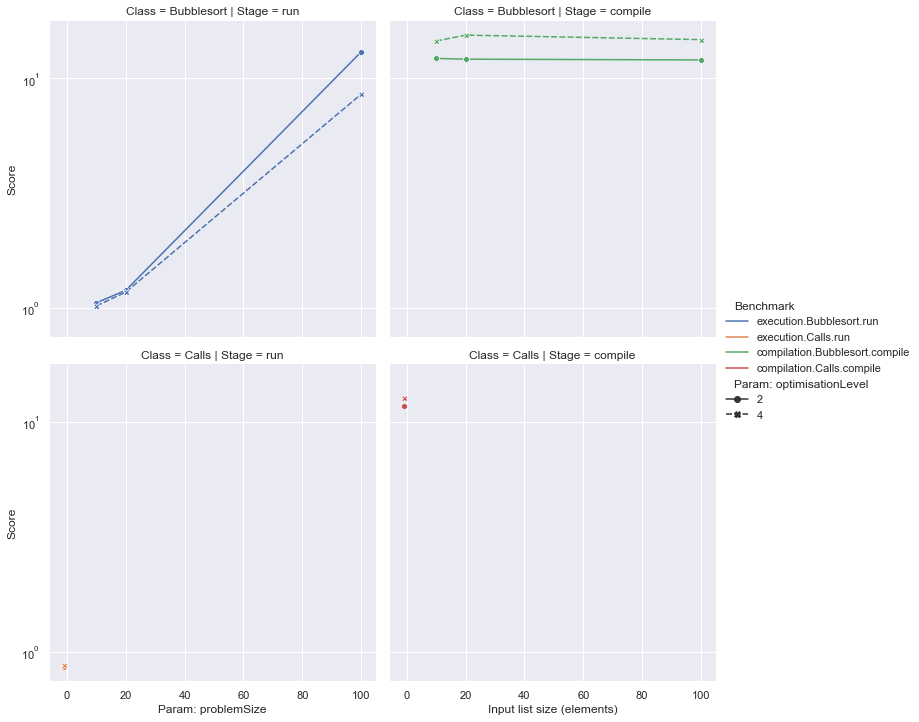

In [121]:
g = sns.relplot(
    data=df,
    x="Param: problemSize",
    y="Score",
    row="Class",
    col="Stage",
    style="Param: optimisationLevel",
    hue="Benchmark",
    kind="line",
    markers=True,
)

plt.yscale("log")
plt.ylabel("Runtime (s)")
plt.xlabel("Input list size (elements)")

plt.savefig(f"example-plots/BS-{results_file}.png", transparent=False)